In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.utils import shuffle
import csv
import cv2
import itertools
import numpy as np
import pandas as pd
import os
import sys
import tempfile
import tqdm

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import tensorflow_addons as tfa
%matplotlib inline

In [36]:
def load_pose_landmarks(csv_path):
    """Loads a CSV created by MoveNetPreprocessor.
    Returns:
        X: Detected landmark coordinates and scores of shape (N, 17 * 3)
        y: Ground truth labels of shape (N, label_count)
        classes: The list of all class names found in the dataset
        dataframe: The CSV loaded as a Pandas dataframe features (X) and ground
        truth labels (y) to use later to train a pose classification model.
    """

    # Load the CSV file
    dataframe = pd.read_csv(csv_path)
    
    labels = dataframe["label"] - 1#pd.read_csv(labels_path, header=None)
    
    print(labels.unique())
    df_to_process = dataframe.copy()

    # Drop the file_name columns as you don't need it during training.
    df_to_process.drop(columns=['file_name'], inplace=True)

    # Extract the list of class names
    df_to_process.pop('class_name')
    df_to_process.pop('class_no')
    df_to_process.pop('label')

    # Extract the labels
    y = labels
    classes = range(6)

    # Convert the input features and labels into the correct format for training.
    X = df_to_process.astype('float64')
    y = keras.utils.to_categorical(y)

    return X, y, classes, dataframe

In [44]:
# Read labels file

data_path = '/home/shellygoel2324/data_merged.csv'

# Load the train data
X, y, class_names, _ = load_pose_landmarks(data_path)

print(X.shape, y.shape)

y = np.argmax(y, 1)

# Split training data (X, y) into (X_train, y_train) and (X_val, y_val)

# 80/10/10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

#60/20/20
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

[0. 3. 1. 2. 4. 5.]
(12056, 51) (12056, 6)
(9644, 51) (1206, 51) (1206, 51)
(9644,) (1206,) (1206,)


In [46]:
print("TRAIN DISTRIBUTION")

sample_dist = []
for i in range(0,6):
    
    num_i = 0
    for sample in y_train:
            if sample == i:
                num_i+=1
    dist = num_i/len(y_train)
    print(f"{i}: {dist}")
    sample_dist.append(dist)


print("\nTEST DISTRIBUTION")
for i in range(0,6):
    
    num_i = 0
    for sample in y_test:
            if sample == i:
                num_i+=1

    dist = num_i/len(y_test)
    print(f"{i}: {dist}")
    #sample_dist.append(dist)

TRAIN DISTRIBUTION
0: 0.5412691829116549
1: 0.25964330153463294
2: 0.11406055578598093
3: 0.047698050601410205
4: 0.02789299046038988
5: 0.009435918705931148

TEST DISTRIBUTION
0: 0.5655058043117744
1: 0.2462686567164179
2: 0.11525704809286899
3: 0.0472636815920398
4: 0.02155887230514096
5: 0.0041459369817578775


In [47]:

logreg = LogisticRegression(max_iter = 1000,solver = 'sag', verbose = 1)
logreg.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 change: 0.00049644
Epoch 961, change: 0.00049560
Epoch 962, change: 0.00049558
Epoch 963, change: 0.00049490
Epoch 964, change: 0.00049408
Epoch 965, change: 0.00049420
Epoch 966, change: 0.00049415
Epoch 967, change: 0.00049351
Epoch 968, change: 0.00049327
Epoch 969, change: 0.00049300
Epoch 970, change: 0.00049283
Epoch 971, change: 0.00049230
Epoch 972, change: 0.00049202
Epoch 973, change: 0.00049146
Epoch 974, change: 0.00049085
Epoch 975, change: 0.00049063
Epoch 976, change: 0.00049059
Epoch 977, change: 0.00049036
Epoch 978, change: 0.00048970
Epoch 979, change: 0.00048937
Epoch 980, change: 0.00048901
Epoch 981, change: 0.00048889
Epoch 982, change: 0.00048838
Epoch 983, change: 0.00048768
Epoch 984, change: 0.00048750
Epoch 985, change: 0.00048727
Epoch 986, change: 0.00048697
Epoch 987, change: 0.00048646
Epoch 988, change: 0.00048642
Epoch 989, change: 0.00048613
Epoch 990, change: 0.00048549
Epoch 991, change: 0.00048549
Epoch 992, change: 0.00048500
Epoch 993, change: 0

Epoch 373, change: 0.00122803
Epoch 374, change: 0.00122334
Epoch 375, change: 0.00122067
Epoch 376, change: 0.00122487
Epoch 377, change: 0.00121277
Epoch 378, change: 0.00121517
Epoch 379, change: 0.00120952
Epoch 380, change: 0.00120825
Epoch 381, change: 0.00120831
Epoch 382, change: 0.00120301
Epoch 383, change: 0.00120345
Epoch 384, change: 0.00119594
Epoch 385, change: 0.00119150
Epoch 386, change: 0.00119533
Epoch 387, change: 0.00118928
Epoch 388, change: 0.00118980
Epoch 389, change: 0.00118488
Epoch 390, change: 0.00118266
Epoch 391, change: 0.00117300
Epoch 392, change: 0.00117919
Epoch 393, change: 0.00117030
Epoch 394, change: 0.00117613
Epoch 395, change: 0.00117128
Epoch 396, change: 0.00116691
Epoch 397, change: 0.00116458
Epoch 398, change: 0.00116194
Epoch 399, change: 0.00115492
Epoch 400, change: 0.00115764
Epoch 401, change: 0.00115169
Epoch 402, change: 0.00115375
Epoch 403, change: 0.00114888
Epoch 404, change: 0.00114709
Epoch 405, change: 0.00114272
Epoch 406,

Epoch 646, change: 0.00077865
Epoch 647, change: 0.00077515
Epoch 648, change: 0.00077725
Epoch 649, change: 0.00077289
Epoch 650, change: 0.00077393
Epoch 651, change: 0.00077509
Epoch 652, change: 0.00077035
Epoch 653, change: 0.00077276
Epoch 654, change: 0.00077007
Epoch 655, change: 0.00076980
Epoch 656, change: 0.00076858
Epoch 657, change: 0.00076726
Epoch 658, change: 0.00076765
Epoch 659, change: 0.00076565
Epoch 660, change: 0.00076578
Epoch 661, change: 0.00076491
Epoch 662, change: 0.00076402
Epoch 663, change: 0.00076253
Epoch 664, change: 0.00076138
Epoch 665, change: 0.00076128
Epoch 666, change: 0.00075963
Epoch 667, change: 0.00075859
Epoch 668, change: 0.00075979
Epoch 669, change: 0.00075783
Epoch 670, change: 0.00075720
Epoch 671, change: 0.00075619
Epoch 672, change: 0.00075557
Epoch 673, change: 0.00075386
Epoch 674, change: 0.00075418
Epoch 675, change: 0.00075200
Epoch 676, change: 0.00075260
Epoch 677, change: 0.00075357
Epoch 678, change: 0.00074955
Epoch 679,

Epoch 919, change: max_iter reached after 19 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s finished


LogisticRegression(max_iter=1000, solver='sag', verbose=1)

In [48]:
prediction = logreg.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       682
           1       0.80      0.93      0.86       297
           2       0.86      0.64      0.74       139
           3       0.52      0.25      0.33        57
           4       0.78      0.69      0.73        26
           5       1.00      0.20      0.33         5

    accuracy                           0.88      1206
   macro avg       0.82      0.61      0.66      1206
weighted avg       0.87      0.88      0.87      1206



In [51]:
score = logreg.score(X_test, y_test)
print(score)

0.8822553897180763


Feature: 0, Score: 0.03863
Feature: 1, Score: -0.07683
Feature: 2, Score: -0.04327
Feature: 3, Score: -0.01913
Feature: 4, Score: 0.10515
Feature: 5, Score: -0.05396
Feature: 6, Score: 0.03074
Feature: 7, Score: 0.05332
Feature: 8, Score: -0.05787
Feature: 9, Score: -0.00805
Feature: 10, Score: -0.04776
Feature: 11, Score: -0.06815
Feature: 12, Score: 0.01202
Feature: 13, Score: -0.15786
Feature: 14, Score: -0.07485
Feature: 15, Score: 0.00933
Feature: 16, Score: -0.02480
Feature: 17, Score: -0.05214
Feature: 18, Score: -0.09251
Feature: 19, Score: -0.05834
Feature: 20, Score: -0.05298
Feature: 21, Score: -0.05170
Feature: 22, Score: -0.07516
Feature: 23, Score: -0.03503
Feature: 24, Score: 0.09672
Feature: 25, Score: -0.07362
Feature: 26, Score: -0.05378
Feature: 27, Score: 0.04747
Feature: 28, Score: 0.05186
Feature: 29, Score: -0.03641
Feature: 30, Score: -0.05571
Feature: 31, Score: 0.04473
Feature: 32, Score: -0.06156
Feature: 33, Score: -0.04364
Feature: 34, Score: 0.15867
Featur

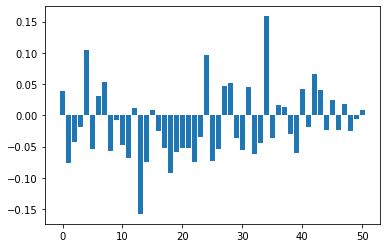

In [52]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
importance = logreg.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

Normalized confusion matrix


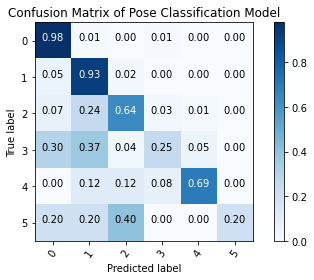

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Plots the confusion matrix."""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm,
                      class_names,normalize=True,
                      title ='Confusion Matrix of Pose Classification Model')


In [ ]:
from io import StringIO

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = LogisticRegression(max_iter = 1000,solver = 'sag')
clf.fit(X_train,y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.savefig("pure_LogRes.png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.close()